### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [7]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from glob import glob

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [10]:
!unzip gdrive/MyDrive/CNN\ assignment

Archive:  gdrive/MyDrive/CNN assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflating: Skin ca

In [8]:

data_dir_train = pathlib.Path("S:\Masters_CSE_PSU\CSE 586 Computer Vision II\Project\Implementation\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train")
data_dir_test = pathlib.Path('S:\Masters_CSE_PSU\CSE 586 Computer Vision II\Project\Implementation\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Test')

In [9]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [10]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [11]:

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [12]:

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [13]:

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

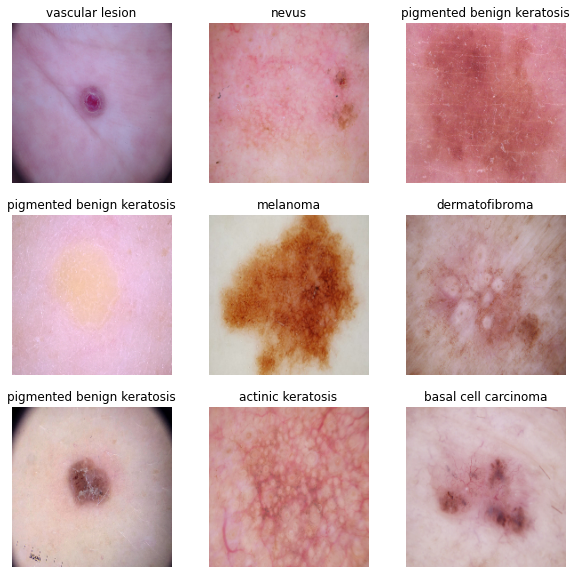

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")



The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [51]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [9]:

num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])





### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [169]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [85]:
# View the summary of all layers
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 45, 45, 64)       

### Train the model

In [86]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 28s 472ms/step - loss: 1.9919 - accuracy: 0.2757 - val_loss: 1.8996 - val_accuracy: 0.3266
Epoch 2/20
56/56 [==============================] - 27s 480ms/step - loss: 1.6388 - accuracy: 0.4235 - val_loss: 1.4578 - val_accuracy: 0.5056
Epoch 3/20
56/56 [==============================] - 28s 487ms/step - loss: 1.4194 - accuracy: 0.5117 - val_loss: 1.3959 - val_accuracy: 0.5145
Epoch 4/20
56/56 [==============================] - 27s 478ms/step - loss: 1.3259 - accuracy: 0.5340 - val_loss: 1.3533 - val_accuracy: 0.4966
Epoch 5/20
56/56 [==============================] - 28s 488ms/step - loss: 1.2382 - accuracy: 0.5619 - val_loss: 1.4030 - val_accuracy: 0.5190
Epoch 6/20
56/56 [==============================] - 28s 483ms/step - loss: 1.1563 - accuracy: 0.5826 - val_loss: 1.3271 - val_accuracy: 0.5414
Epoch 7/20
56/56 [==============================] - 28s 487ms/step - loss: 1.0756 - accuracy: 0.6205 - val_loss: 1.3809 - val_accuracy: 0.5503

### Visualizing training results

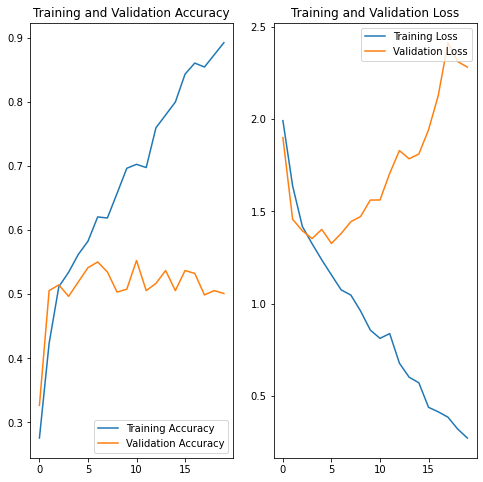

In [87]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [88]:
y_true=[]
y_pred=[]
for images, labels in train_ds:
  # print(model.predict_classes(images))
  # print(labels.numpy())
  y_true=list(labels.numpy())
  y_pred=np.argmax(model.predict(images), axis=-1)
  # break
print(classification_report(y_true,y_pred,target_names=class_names))
print("*"*20)
print("Accuracy on test dataset : ",accuracy_score(y_true,y_pred))

                            precision    recall  f1-score   support

         actinic keratosis       0.67      1.00      0.80         2
      basal cell carcinoma       1.00      0.80      0.89         5
            dermatofibroma       1.00      1.00      1.00         2
                  melanoma       1.00      0.89      0.94         9
                     nevus       1.00      0.75      0.86         4
pigmented benign keratosis       1.00      1.00      1.00         4
      seborrheic keratosis       0.00      0.00      0.00         0
   squamous cell carcinoma       0.75      1.00      0.86         3
           vascular lesion       1.00      1.00      1.00         3

                  accuracy                           0.91        32
                 macro avg       0.82      0.83      0.82        32
              weighted avg       0.96      0.91      0.92        32

********************
Accuracy on test dataset :  0.90625


In [89]:
y_true=[]
y_pred=[]
for images, labels in val_ds:
  # print(model.predict_classes(images))
  # print(labels.numpy())
  y_true=list(labels.numpy())
  y_pred=np.argmax(model.predict(images), axis=-1)
  # break
print(classification_report(y_true,y_pred,target_names=val_ds.class_names))
print("*"*20)
print("Accuracy on validation dataset : ",accuracy_score(y_true,y_pred))

                            precision    recall  f1-score   support

         actinic keratosis       1.00      0.33      0.50         3
      basal cell carcinoma       0.33      0.33      0.33         6
            dermatofibroma       0.50      1.00      0.67         1
                  melanoma       0.50      0.17      0.25         6
                     nevus       0.71      1.00      0.83         5
pigmented benign keratosis       0.67      0.50      0.57         4
      seborrheic keratosis       0.00      0.00      0.00         1
   squamous cell carcinoma       0.29      0.67      0.40         3
           vascular lesion       1.00      0.50      0.67         2

                  accuracy                           0.48        31
                 macro avg       0.56      0.50      0.47        31
              weighted avg       0.57      0.48      0.47        31

********************
Accuracy on validation dataset :  0.4838709677419355


# Trying with different Optimiser: sgd (Before Augmentation)

In [91]:
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 45, 45, 64)       

In [92]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 28s 476ms/step - loss: 2.0410 - accuracy: 0.2026 - val_loss: 2.0320 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 28s 490ms/step - loss: 2.0127 - accuracy: 0.2344 - val_loss: 2.0039 - val_accuracy: 0.2192
Epoch 3/20
56/56 [==============================] - 27s 476ms/step - loss: 1.9862 - accuracy: 0.2522 - val_loss: 1.9979 - val_accuracy: 0.1946
Epoch 4/20
56/56 [==============================] - 28s 481ms/step - loss: 1.9502 - accuracy: 0.2712 - val_loss: 1.8973 - val_accuracy: 0.2886
Epoch 5/20
56/56 [==============================] - 28s 494ms/step - loss: 1.9079 - accuracy: 0.2863 - val_loss: 1.8275 - val_accuracy: 0.3624
Epoch 6/20
56/56 [==============================] - 28s 486ms/step - loss: 1.8599 - accuracy: 0.3119 - val_loss: 1.8396 - val_accuracy: 0.3333
Epoch 7/20
56/56 [==============================] - 28s 487ms/step - loss: 1.8383 - accuracy: 0.3231 - val_loss: 1.7336 - val_accuracy: 0.4206

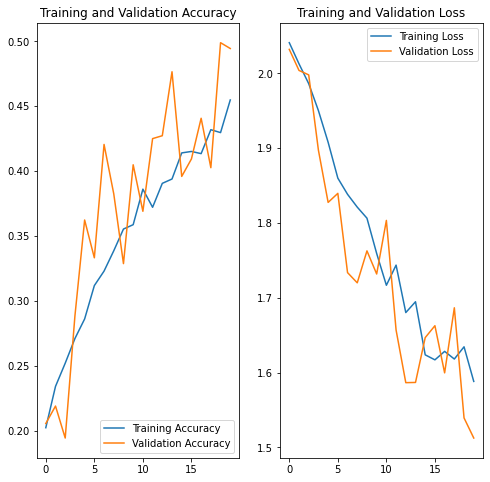

In [93]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [96]:
y_true=[]
y_pred=[]
for images, labels in train_ds:
  # print(model.predict_classes(images))
  # print(labels.numpy())
  y_true=list(labels.numpy())
  y_pred=np.argmax(model.predict(images), axis=-1)
  # break
print(classification_report(y_true,y_pred,target_names=class_names))
print("*"*20)
print("Accuracy on test dataset : ",accuracy_score(y_true,y_pred))

y_true=[]
y_pred=[]
for images, labels in val_ds:
  # print(model.predict_classes(images))
  # print(labels.numpy())
  y_true=list(labels.numpy())
  y_pred=np.argmax(model.predict(images), axis=-1)
  # break
print(classification_report(y_true,y_pred,target_names=val_ds.class_names))
print("*"*20)
print("Accuracy on validation dataset : ",accuracy_score(y_true,y_pred))

                            precision    recall  f1-score   support

         actinic keratosis       0.00      0.00      0.00         1
      basal cell carcinoma       0.46      0.75      0.57         8
            dermatofibroma       0.00      0.00      0.00         4
                  melanoma       0.43      1.00      0.60         3
                     nevus       1.00      0.60      0.75         5
pigmented benign keratosis       0.38      0.75      0.50         4
      seborrheic keratosis       0.00      0.00      0.00         1
   squamous cell carcinoma       0.00      0.00      0.00         5
           vascular lesion       1.00      1.00      1.00         1

                  accuracy                           0.50        32
                 macro avg       0.36      0.46      0.38        32
              weighted avg       0.39      0.50      0.41        32

********************
Accuracy on test dataset :  0.5
                            precision    recall  f1-score   

# Trying with different Optimiser: adagrad (Before Augmentation)

In [97]:
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adagrad',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 45, 45, 64)       

In [98]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 28s 487ms/step - loss: 2.0481 - accuracy: 0.2210 - val_loss: 2.0207 - val_accuracy: 0.1857
Epoch 2/20
56/56 [==============================] - 28s 482ms/step - loss: 1.9923 - accuracy: 0.2595 - val_loss: 1.9919 - val_accuracy: 0.2371
Epoch 3/20
56/56 [==============================] - 28s 488ms/step - loss: 1.9635 - accuracy: 0.2874 - val_loss: 1.9527 - val_accuracy: 0.3333
Epoch 4/20
56/56 [==============================] - 28s 492ms/step - loss: 1.9319 - accuracy: 0.3097 - val_loss: 1.9157 - val_accuracy: 0.3378
Epoch 5/20
56/56 [==============================] - 28s 488ms/step - loss: 1.8975 - accuracy: 0.3153 - val_loss: 1.8770 - val_accuracy: 0.3266
Epoch 6/20
56/56 [==============================] - 28s 490ms/step - loss: 1.8648 - accuracy: 0.3231 - val_loss: 1.8460 - val_accuracy: 0.3445
Epoch 7/20
56/56 [==============================] - 29s 497ms/step - loss: 1.8316 - accuracy: 0.3438 - val_loss: 1.8149 - val_accuracy: 0.3736

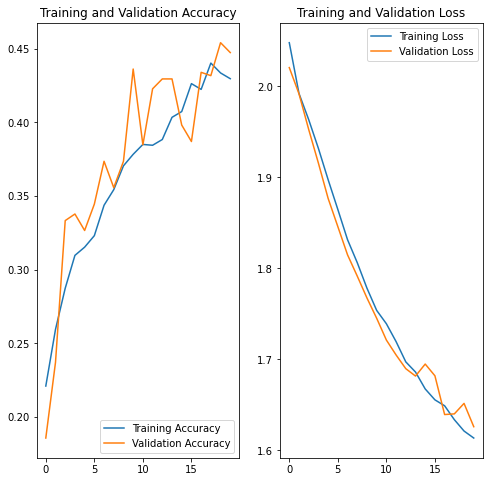

In [99]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [105]:
y_true=[]
y_pred=[]
for images, labels in train_ds:
  # print(model.predict_classes(images))
  # print(labels.numpy())
  y_true=list(labels.numpy())
  y_pred=np.argmax(model.predict(images), axis=-1)
  # break
print(classification_report(y_true,y_pred,target_names=class_names))
print("*"*20)
print("Accuracy on test dataset : ",accuracy_score(y_true,y_pred))

y_true=[]
y_pred=[]
for images, labels in val_ds:
  # print(model.predict_classes(images))
  # print(labels.numpy())
  y_true=list(labels.numpy())
  y_pred=np.argmax(model.predict(images), axis=-1)
  # break
print(classification_report(y_true,y_pred,target_names=val_ds.class_names))
print("*"*20)
print("Accuracy on validation dataset : ",accuracy_score(y_true,y_pred))

                            precision    recall  f1-score   support

         actinic keratosis       0.00      0.00      0.00         4
      basal cell carcinoma       0.33      0.88      0.48         8
            dermatofibroma       0.00      0.00      0.00         1
                  melanoma       0.33      0.67      0.44         3
                     nevus       0.00      0.00      0.00         6
pigmented benign keratosis       0.20      0.20      0.20         5
      seborrheic keratosis       0.00      0.00      0.00         1
   squamous cell carcinoma       0.00      0.00      0.00         1
           vascular lesion       0.00      0.00      0.00         3

                  accuracy                           0.31        32
                 macro avg       0.10      0.19      0.13        32
              weighted avg       0.15      0.31      0.19        32

********************
Accuracy on test dataset :  0.3125
                            precision    recall  f1-score

In [159]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("vertical", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.5),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

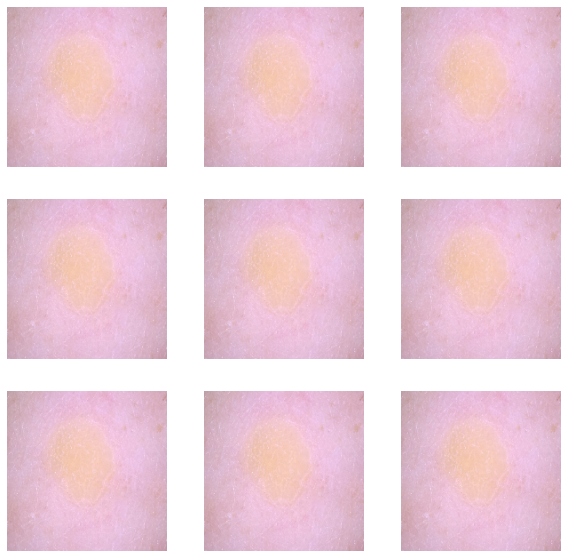

In [165]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [117]:


model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



### Compiling the model

In [118]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [119]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_9 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                

### Training the model

In [120]:

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 32s 537ms/step - loss: 2.0971 - accuracy: 0.2165 - val_loss: 1.9891 - val_accuracy: 0.2550
Epoch 2/20
56/56 [==============================] - 31s 547ms/step - loss: 1.9254 - accuracy: 0.2796 - val_loss: 1.8439 - val_accuracy: 0.3266
Epoch 3/20
56/56 [==============================] - 31s 535ms/step - loss: 1.7495 - accuracy: 0.3722 - val_loss: 1.8179 - val_accuracy: 0.3602
Epoch 4/20
56/56 [==============================] - 31s 539ms/step - loss: 1.5879 - accuracy: 0.4386 - val_loss: 1.4394 - val_accuracy: 0.4944
Epoch 5/20
56/56 [==============================] - 32s 560ms/step - loss: 1.4286 - accuracy: 0.4972 - val_loss: 1.3288 - val_accuracy: 0.5548
Epoch 6/20
56/56 [==============================] - 32s 557ms/step - loss: 1.3706 - accuracy: 0.5156 - val_loss: 1.5173 - val_accuracy: 0.4720
Epoch 7/20
56/56 [==============================] - 32s 556ms/step - loss: 1.4285 - accuracy: 0.4927 - val_loss: 1.3355 - val_accuracy: 0.5369

### Visualizing the results

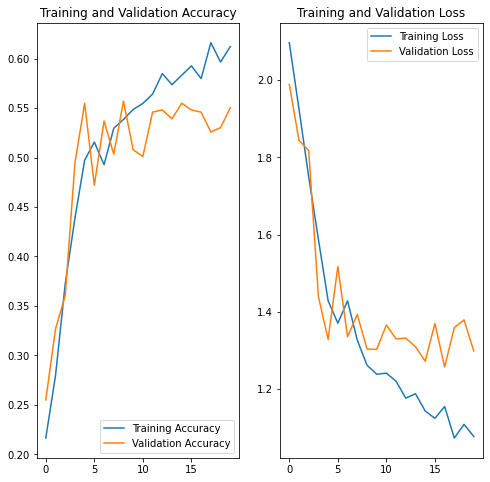

In [121]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [122]:
y_true=[]
y_pred=[]
for images, labels in train_ds:
  # print(model.predict_classes(images))
  # print(labels.numpy())
  y_true=list(labels.numpy())
  y_pred=np.argmax(model.predict(images), axis=-1)
  # break
print(classification_report(y_true,y_pred,target_names=class_names))
print("*"*20)
print("Accuracy on test dataset : ",accuracy_score(y_true,y_pred))



                            precision    recall  f1-score   support

         actinic keratosis       0.33      0.50      0.40         2
      basal cell carcinoma       0.50      0.80      0.62         5
            dermatofibroma       0.00      0.00      0.00         2
                  melanoma       0.80      0.44      0.57         9
                     nevus       0.50      0.50      0.50         4
pigmented benign keratosis       0.60      0.75      0.67         4
      seborrheic keratosis       0.00      0.00      0.00         0
   squamous cell carcinoma       0.00      0.00      0.00         3
           vascular lesion       1.00      1.00      1.00         3

                  accuracy                           0.53        32
                 macro avg       0.41      0.44      0.42        32
              weighted avg       0.56      0.53      0.52        32

********************
Accuracy on test dataset :  0.53125


In [125]:
y_true=[]
y_pred=[]
for images, labels in val_ds:
  # print(model.predict_classes(images))
  # print(labels.numpy())
  y_true=list(labels.numpy())
  y_pred=np.argmax(model.predict(images), axis=-1)
  # break
print(classification_report(y_true,y_pred,target_names=val_ds.class_names))
print("*"*20)
print("Accuracy on validation dataset : ",accuracy_score(y_true,y_pred))

                            precision    recall  f1-score   support

         actinic keratosis       0.50      0.33      0.40         3
      basal cell carcinoma       0.70      1.00      0.82         7
            dermatofibroma       0.00      0.00      0.00         1
                  melanoma       0.60      0.60      0.60         5
                     nevus       0.40      0.40      0.40         5
pigmented benign keratosis       0.50      0.50      0.50         2
      seborrheic keratosis       0.00      0.00      0.00         2
   squamous cell carcinoma       0.00      0.00      0.00         4
           vascular lesion       1.00      1.00      1.00         2

                  accuracy                           0.52        31
                 macro avg       0.41      0.43      0.41        31
              weighted avg       0.46      0.52      0.48        31

********************
Accuracy on validation dataset :  0.5161290322580645


# Trying with different Optimiser: sgd

In [126]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_10 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                

In [127]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 32s 544ms/step - loss: 2.0501 - accuracy: 0.2020 - val_loss: 2.0341 - val_accuracy: 0.1633
Epoch 2/20
56/56 [==============================] - 31s 538ms/step - loss: 2.0127 - accuracy: 0.2321 - val_loss: 2.0116 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 31s 540ms/step - loss: 1.9834 - accuracy: 0.2612 - val_loss: 1.9574 - val_accuracy: 0.2908
Epoch 4/20
56/56 [==============================] - 30s 535ms/step - loss: 1.9516 - accuracy: 0.2852 - val_loss: 1.8754 - val_accuracy: 0.3758
Epoch 5/20
56/56 [==============================] - 31s 533ms/step - loss: 1.9191 - accuracy: 0.2941 - val_loss: 1.8718 - val_accuracy: 0.3043
Epoch 6/20
56/56 [==============================] - 30s 530ms/step - loss: 1.8737 - accuracy: 0.3036 - val_loss: 1.8637 - val_accuracy: 0.3266
Epoch 7/20
56/56 [==============================] - 31s 536ms/step - loss: 1.8533 - accuracy: 0.3259 - val_loss: 1.7323 - val_accuracy: 0.4139

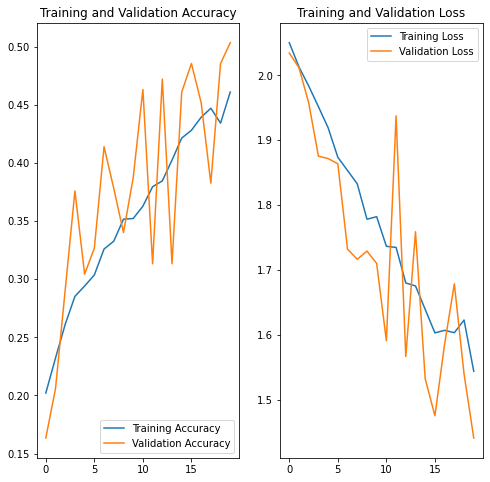

In [128]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [132]:
y_true=[]
y_pred=[]
for images, labels in train_ds:
  # print(model.predict_classes(images))
  # print(labels.numpy())
  y_true=list(labels.numpy())
  y_pred=np.argmax(model.predict(images), axis=-1)
  # break
print(classification_report(y_true,y_pred,target_names=class_names))
print("*"*20)
print("Accuracy on test dataset : ",accuracy_score(y_true,y_pred))

y_true=[]
y_pred=[]
for images, labels in val_ds:
  # print(model.predict_classes(images))
  # print(labels.numpy())
  y_true=list(labels.numpy())
  y_pred=np.argmax(model.predict(images), axis=-1)
  # break
print(classification_report(y_true,y_pred,target_names=val_ds.class_names))
print("*"*20)
print("Accuracy on validation dataset : ",accuracy_score(y_true,y_pred))

                            precision    recall  f1-score   support

         actinic keratosis       0.00      0.00      0.00         4
      basal cell carcinoma       0.25      0.25      0.25         8
            dermatofibroma       0.00      0.00      0.00         1
                  melanoma       0.40      0.67      0.50         3
                     nevus       1.00      0.17      0.29         6
pigmented benign keratosis       0.22      0.80      0.35         5
      seborrheic keratosis       0.00      0.00      0.00         1
   squamous cell carcinoma       0.00      0.00      0.00         1
           vascular lesion       0.00      0.00      0.00         3

                  accuracy                           0.28        32
                 macro avg       0.21      0.21      0.15        32
              weighted avg       0.32      0.28      0.22        32

********************
Accuracy on test dataset :  0.28125
                            precision    recall  f1-scor

# Trying with different Optimiser: adagrad

In [133]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adagrad',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_11 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_33 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                

In [134]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 31s 528ms/step - loss: 2.0566 - accuracy: 0.2020 - val_loss: 2.0289 - val_accuracy: 0.2036
Epoch 2/20
56/56 [==============================] - 30s 525ms/step - loss: 2.0152 - accuracy: 0.2026 - val_loss: 2.0190 - val_accuracy: 0.1969
Epoch 3/20
56/56 [==============================] - 30s 520ms/step - loss: 2.0058 - accuracy: 0.2349 - val_loss: 1.9944 - val_accuracy: 0.2438
Epoch 4/20
56/56 [==============================] - 31s 542ms/step - loss: 1.9891 - accuracy: 0.2645 - val_loss: 1.9719 - val_accuracy: 0.3423
Epoch 5/20
56/56 [==============================] - 30s 527ms/step - loss: 1.9724 - accuracy: 0.2617 - val_loss: 1.9524 - val_accuracy: 0.3087
Epoch 6/20
56/56 [==============================] - 31s 533ms/step - loss: 1.9542 - accuracy: 0.2868 - val_loss: 1.9331 - val_accuracy: 0.2975
Epoch 7/20
56/56 [==============================] - 31s 544ms/step - loss: 1.9286 - accuracy: 0.3175 - val_loss: 1.8985 - val_accuracy: 0.3736

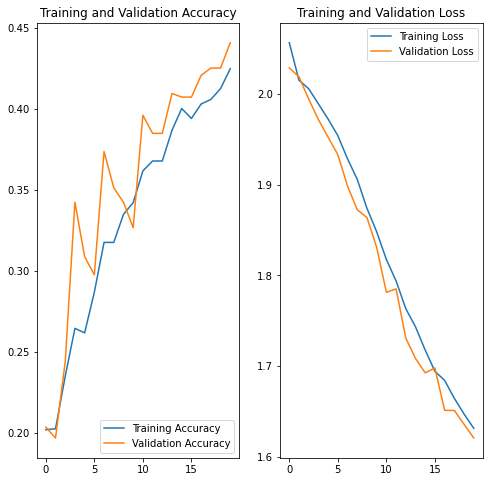

In [135]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [139]:
y_true=[]
y_pred=[]
for images, labels in train_ds:
  # print(model.predict_classes(images))
  # print(labels.numpy())
  y_true=list(labels.numpy())
  y_pred=np.argmax(model.predict(images), axis=-1)
  # break
print(classification_report(y_true,y_pred,target_names=class_names))
print("*"*20)
print("Accuracy on test dataset : ",accuracy_score(y_true,y_pred))

y_true=[]
y_pred=[]
for images, labels in val_ds:
  # print(model.predict_classes(images))
  # print(labels.numpy())
  y_true=list(labels.numpy())
  y_pred=np.argmax(model.predict(images), axis=-1)
  # break
print(classification_report(y_true,y_pred,target_names=val_ds.class_names))
print("*"*20)
print("Accuracy on validation dataset : ",accuracy_score(y_true,y_pred))

                            precision    recall  f1-score   support

         actinic keratosis       0.00      0.00      0.00         4
      basal cell carcinoma       0.36      0.62      0.45         8
            dermatofibroma       0.00      0.00      0.00         1
                  melanoma       0.33      0.67      0.44         3
                     nevus       0.50      0.17      0.25         6
pigmented benign keratosis       0.30      0.60      0.40         5
      seborrheic keratosis       0.00      0.00      0.00         1
   squamous cell carcinoma       0.00      0.00      0.00         1
           vascular lesion       0.00      0.00      0.00         3

                  accuracy                           0.34        32
                 macro avg       0.17      0.23      0.17        32
              weighted avg       0.26      0.34      0.26        32

********************
Accuracy on test dataset :  0.34375
                            precision    recall  f1-scor

In [10]:

from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2239

In [11]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,S:\Masters_CSE_PSU\CSE 586 Computer Vision II\...,actinic keratosis
1,S:\Masters_CSE_PSU\CSE 586 Computer Vision II\...,actinic keratosis
2,S:\Masters_CSE_PSU\CSE 586 Computer Vision II\...,actinic keratosis
3,S:\Masters_CSE_PSU\CSE 586 Computer Vision II\...,actinic keratosis
4,S:\Masters_CSE_PSU\CSE 586 Computer Vision II\...,actinic keratosis
...,...,...
2234,S:\Masters_CSE_PSU\CSE 586 Computer Vision II\...,vascular lesion
2235,S:\Masters_CSE_PSU\CSE 586 Computer Vision II\...,vascular lesion
2236,S:\Masters_CSE_PSU\CSE 586 Computer Vision II\...,vascular lesion
2237,S:\Masters_CSE_PSU\CSE 586 Computer Vision II\...,vascular lesion


Class=0, n=114 (5.092%)
Class=1, n=376 (16.793%)
Class=2, n=95 (4.243%)
Class=3, n=438 (19.562%)
Class=4, n=357 (15.945%)
Class=5, n=462 (20.634%)
Class=6, n=77 (3.439%)
Class=7, n=181 (8.084%)
Class=8, n=139 (6.208%)


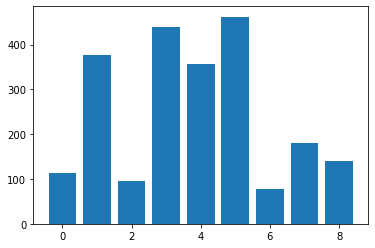

In [29]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
# split into input and output elements
X, y = original_df['Path'], original_df['Label']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [15]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [12]:
path_to_training_dataset="S:\\Masters_CSE_PSU\\CSE 586 Computer Vision II\\Project\\Implementation\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\"
import Augmentor
for i in class_names:
    #print(path_to_training_dataset + i)
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    #p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.flip_left_right(probability=0.5)
    #p.zoom_random(probability=0.5, percentage_area=0.5)
    p.flip_top_bottom(probability=0.5)
    #p.random_distortion(probability=1, grid_width=4, grid_height=4, magnitude=8)
    #p.crop_random(probability=1, percentage_area=0.5)
    
    p.sample(1000) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|                                                               | 0/1000 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to S:\Masters_CSE_PSU\CSE 586 Computer Vision II\Project\Implementation\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x187836B2310>: 100%|█| 1000/1000 [00:11<00:00, 90.23 Sample
Executing Pipeline:   0%|                                                               | 0/1000 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to S:\Masters_CSE_PSU\CSE 586 Computer Vision II\Project\Implementation\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x187834287C0>: 100%|█| 1000/1000 [00:13<00:00, 72.78 Sample
Executing Pipeline:   0%|                                                               | 0/1000 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to S:\Masters_CSE_PSU\CSE 586 Computer Vision II\Project\Implementation\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x187825E8610>: 100%|█| 1000/1000 [00:11<00:00, 83.99 Sample
Executing Pipeline:   0%|                                                               | 0/1000 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to S:\Masters_CSE_PSU\CSE 586 Computer Vision II\Project\Implementation\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1878343D4F0>: 100%|█| 1000/1000 [01:05<00:00, 15.28 Sampl
Executing Pipeline:   0%|                                                               | 0/1000 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to S:\Masters_CSE_PSU\CSE 586 Computer Vision II\Project\Implementation\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=2565x2000 at 0x187826E6E50>: 100%|█| 1000/1000 [01:00<00:00, 16.40 Samp
Executing Pipeline:   0%|                                                               | 0/1000 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to S:\Masters_CSE_PSU\CSE 586 Computer Vision II\Project\Implementation\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1878352E0A0>: 100%|█| 1000/1000 [00:13<00:00, 74.76 Sample
Executing Pipeline:   0%|                                                               | 0/1000 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to S:\Masters_CSE_PSU\CSE 586 Computer Vision II\Project\Implementation\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x187826CDD90>: 100%|█| 1000/1000 [00:25<00:00, 39.38 Sampl
Executing Pipeline:   0%|                                                               | 0/1000 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to S:\Masters_CSE_PSU\CSE 586 Computer Vision II\Project\Implementation\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x187826E5F40>: 100%|█| 1000/1000 [00:12<00:00, 76.97 Sample
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x187826022E0>:   0%| | 3/1000 [00:00<00:39, 25.52 Samples/s

Initialised with 139 image(s) found.
Output directory set to S:\Masters_CSE_PSU\CSE 586 Computer Vision II\Project\Implementation\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x18783457460>: 100%|█| 1000/1000 [00:10<00:00, 98.53 Sample


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [13]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


### Lets see the distribution of augmented data after adding new images to the original training data.

In [14]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['S:\\Masters_CSE_PSU\\CSE 586 Computer Vision II\\Project\\Implementation\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_0ec26f4f-8f9b-4767-8d83-fabc73562d3a.jpg',
 'S:\\Masters_CSE_PSU\\CSE 586 Computer Vision II\\Project\\Implementation\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_3995a700-8ddf-43b5-8ad0-daa2aced3182.jpg',
 'S:\\Masters_CSE_PSU\\CSE 586 Computer Vision II\\Project\\Implementation\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_4ad403dc-14e9-4ca6-885d-4be941d58c18.jpg',
 'S:\\Masters_CSE_PSU\\CSE 586 Computer Vision II\\Project\\Implementation\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic ke

In [15]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [16]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [17]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [18]:
new_df['Label'].value_counts()

pigmented benign keratosis    1462
melanoma                      1438
basal cell carcinoma          1376
nevus                         1357
squamous cell carcinoma       1181
vascular lesion               1139
actinic keratosis             1114
dermatofibroma                1095
seborrheic keratosis          1077
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [19]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [20]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


#### **Todo:** Create a validation dataset

In [21]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [22]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
num_classes = 9
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [23]:


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [24]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
281/281 [==============================] - 233s 575ms/step - loss: 1.7422 - accuracy: 0.3325 - val_loss: 1.4949 - val_accuracy: 0.4286
Epoch 2/20
281/281 [==============================] - 143s 511ms/step - loss: 1.3577 - accuracy: 0.4828 - val_loss: 1.3219 - val_accuracy: 0.4913
Epoch 3/20
281/281 [==============================] - 145s 516ms/step - loss: 1.2217 - accuracy: 0.5329 - val_loss: 1.2002 - val_accuracy: 0.5443
Epoch 4/20
281/281 [==============================] - 144s 511ms/step - loss: 1.0610 - accuracy: 0.5976 - val_loss: 1.1025 - val_accuracy: 0.5857
Epoch 5/20
281/281 [==============================] - 133s 473ms/step - loss: 0.9681 - accuracy: 0.6366 - val_loss: 1.0932 - val_accuracy: 0.5915
Epoch 6/20
281/281 [==============================] - 130s 462ms/step - loss: 0.8338 - accuracy: 0.6901 - val_loss: 1.0042 - val_accuracy: 0.6493
Epoch 7/20
281/281 [==============================] - 153s 543ms/step - loss: 0.7066 - accuracy: 0.7383 - val_loss: 0.9952 -

#### **Todo:**  Visualize the model results

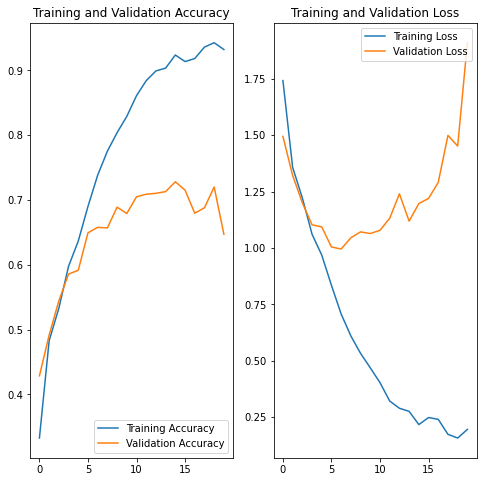

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [16]:
path_to_training_dataset="S:\\Masters_CSE_PSU\\CSE 586 Computer Vision II\\Project\\Implementation\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to S:\Masters_CSE_PSU\CSE 586 Computer Vision II\Project\Implementation\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x196960FC880>: 100%|█| 500/500 [00:07<00:00, 65.17 Samples/
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to S:\Masters_CSE_PSU\CSE 586 Computer Vision II\Project\Implementation\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1969611A580>: 100%|█| 500/500 [00:07<00:00, 65.68 Samples/
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x196966B18E0>:   0%|         | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to S:\Masters_CSE_PSU\CSE 586 Computer Vision II\Project\Implementation\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x196960FE850>: 100%|█| 500/500 [00:07<00:00, 66.61 Samples/
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to S:\Masters_CSE_PSU\CSE 586 Computer Vision II\Project\Implementation\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x19695D4EEE0>: 100%|█| 500/500 [00:35<00:00, 13.92 Sample
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to S:\Masters_CSE_PSU\CSE 586 Computer Vision II\Project\Implementation\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1969603D850>: 100%|█| 500/500 [00:34<00:00, 14.33 Samples
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to S:\Masters_CSE_PSU\CSE 586 Computer Vision II\Project\Implementation\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1969610B9D0>: 100%|█| 500/500 [00:08<00:00, 56.20 Samples/
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to S:\Masters_CSE_PSU\CSE 586 Computer Vision II\Project\Implementation\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\seborrheic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x19695F3F730>: 100%|█| 500/500 [00:16<00
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x19696699EB0>:   0%| | 1/500 [00:00<01:27

Initialised with 181 image(s) found.
Output directory set to S:\Masters_CSE_PSU\CSE 586 Computer Vision II\Project\Implementation\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1969602D1C0>: 100%|█| 500/500 [00:08<00:00, 59.35 Samples/
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to S:\Masters_CSE_PSU\CSE 586 Computer Vision II\Project\Implementation\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x196960B5AF0>: 100%|█| 500/500 [00:06<00:00, 80.91 Samples/


In [18]:
data_augmentation = keras.Sequential (
    [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)


In [20]:
num_classes = 9

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
